<a href="https://colab.research.google.com/github/ayushkesh/ee_sweetviz/blob/main/sweetvizAcad_IITH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analysis required:
##### Total energy generated by String 1 (for entire 2020 year)
##### Total energy generated by String 2 (for entire 2020 Year)
##### Monthly energy generated by String 1 and 2
##### Comparison of strings 1 and 2


In [1]:
# Importing library
import glob
import pandas as pd
import matplotlib.pyplot as plt
fnames = glob.glob("/content/drive/MyDrive/Solar 5kw data Acad Block A/*.csv")
print(fnames)

['/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_96131611100260_2020-04-16_00_00_2020-04-30_23_59_1.csv', '/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_96131611100260_2020-07-01_00_00_2020-07-15_23_59_1.csv', '/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_96131611100260_2020-08-16_00_00_2020-08-31_23_59_1.csv', '/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_96131611100260_2020-09-01_00_00_2020-09-15_23_59_1.csv', '/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_96131611100260_2020-03-16_00_00_2020-03-31_23_59_1.csv', '/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_96131611100260_2020-04-01_00_00_2020-04-15_23_59_1.csv', '/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_96131611100260_2020-11-16_00_00_2020-11-30_23_59_1.csv', '/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_96131611100260_2020-11-01_00_00_2020-11-15_23_59_1.csv', '/content/drive/MyDrive/Solar 5kw data Acad Block A/datalog_961

In [2]:
#Combining File (Concatenate CSV File)
dfs=[]
for fname in fnames:
    #print("reading File- :", fname)
    dfs.append(pd.read_csv(fname,parse_dates=['Time']))

bf = pd.concat(dfs, ignore_index=True)
print(bf.shape)

(81407, 21)


In [3]:
# Data validation 
bf.isnull().sum()

#                            0
Device mode                  0
Time                         0
PV1 input voltage            0
PV1 input current            0
PV1 input power              0
PV2 input voltage            0
PV2 input current            0
PV2 input power              0
Grid voltage                 0
Grid frequency               0
Battery voltage              0
Battery capacity             0
Battery charging current     0
Battery discharge current    0
AC output voltage            0
AC output frequency          0
AC output apparent power     0
AC output active power       0
Output load percent          0
Feed-in grid power           0
dtype: int64

In [4]:
# remove # and Device Mode feature
bf= bf.drop(["#","Device mode"],axis=1)

In [5]:
bf.head()

,Time,PV1 input voltage,PV1 input current,PV1 input power,PV2 input voltage,PV2 input current,PV2 input power,Grid voltage,Grid frequency,Battery voltage,Battery capacity,Battery charging current,Battery discharge current,AC output voltage,AC output frequency,AC output apparent power,AC output active power,Output load percent,Feed-in grid power
0,2020-04-30 23:59:09,0.0,0.0,0,0.0,0.0,0,238.9,50.0,54.1,100,1.0,0.0,238.9,50.0,525,316,10,0
1,2020-04-30 23:54:01,0.0,0.0,0,0.0,0.0,0,238.5,50.0,54.0,100,0.0,0.0,238.5,50.0,572,420,11,0
2,2020-04-30 23:49:02,0.0,0.0,0,0.0,0.0,0,238.7,49.9,54.0,100,0.0,0.0,238.7,49.9,596,371,11,0
3,2020-04-30 23:44:03,0.0,0.0,0,0.0,0.0,0,238.4,49.9,54.0,100,0.0,0.0,238.4,49.9,571,411,11,0
4,2020-04-30 23:39:04,0.0,0.0,0,0.0,0.0,0,238.5,50.0,54.0,100,0.0,0.0,238.5,50.0,643,428,12,0


In [6]:
#print(bf['PV1 input power'].describe())
#print(bf['PV2 input power'].describe())
#print(bf['AC output active power'].describe())
#print(bf['Battery capacity'].describe())

# month and time
ab=bf.resample('M', on='Time').mean()
#print(ab['PV1 input power'], ab['PV2 input power'])
#print(ab['PV1 input power'])
labels = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 


In [7]:
ab.aggregate(['sum']) 

,PV1 input voltage,PV1 input current,PV1 input power,PV2 input voltage,PV2 input current,PV2 input power,Grid voltage,Grid frequency,Battery voltage,Battery capacity,Battery charging current,Battery discharge current,AC output voltage,AC output frequency,AC output apparent power,AC output active power,Output load percent,Feed-in grid power
sum,504.078455,34.06019,3449.576596,503.069015,44.325818,4507.744784,2413.224569,498.278244,540.069991,999.464044,4.536865,4.302153,2418.9557,499.525147,6809.718353,4472.710023,131.453931,5896.906483


In [8]:
pv1_energy=(ab['PV1 input power']*24*365)/1000
pv2_energy=(ab['PV2 input power']*24*365)/1000
#print("Total")
print("Monthly energy generated by String 1")
print(pv1_energy)
print("Monthly energy generated by String 2")
print(pv2_energy)

#print(ab['PV1 input voltage'])

Monthly energy generated by String 1
Time
2020-01-31    3052.056374
2020-02-29    3136.687300
2020-03-31    3352.028077
2020-04-30    3536.533739
2020-05-31            NaN
2020-06-30            NaN
2020-07-31    2714.283777
2020-08-31    2476.547155
2020-09-30    2831.534763
2020-10-31    2973.673074
2020-11-30    2959.903459
2020-12-31    3185.043266
Freq: M, Name: PV1 input power, dtype: float64
Monthly energy generated by String 2
Time
2020-01-31    4041.909426
2020-02-29    4097.917429
2020-03-31    4313.513975
2020-04-30    4606.282559
2020-05-31            NaN
2020-06-30            NaN
2020-07-31    3541.949130
2020-08-31    3211.449468
2020-09-30    3684.937668
2020-10-31    3868.078333
2020-11-30    3886.214423
2020-12-31    4235.591897
Freq: M, Name: PV2 input power, dtype: float64


In [9]:
## String production for each month

prod_pv1=ab['PV2 input power']/(ab['PV1 input power']+ab['PV2 input power'])
print("Productivity of string is 1")
print(prod_pv1)


Productivity of string is 1
Time
2020-01-31    0.569767
2020-02-29    0.566433
2020-03-31    0.562715
2020-04-30    0.565687
2020-05-31         NaN
2020-06-30         NaN
2020-07-31    0.566147
2020-08-31    0.564601
2020-09-30    0.565480
2020-10-31    0.565364
2020-11-30    0.567652
2020-12-31    0.570786
Freq: M, dtype: float64


In [10]:
prod_pv2=ab['PV1 input power']/(ab['PV1 input power']+ab['PV2 input power'])
print("Productivity of string 2")
print(prod_pv2)


Productivity of string 2
Time
2020-01-31    0.430233
2020-02-29    0.433567
2020-03-31    0.437285
2020-04-30    0.434313
2020-05-31         NaN
2020-06-30         NaN
2020-07-31    0.433853
2020-08-31    0.435399
2020-09-30    0.434520
2020-10-31    0.434636
2020-11-30    0.432348
2020-12-31    0.429214
Freq: M, dtype: float64


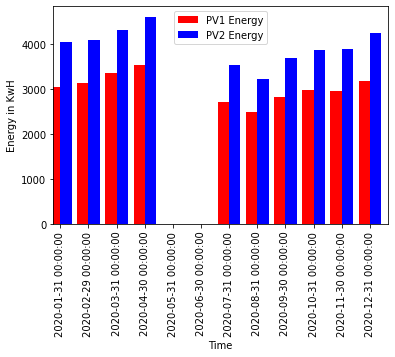

In [11]:
## Plotting
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
#print(pv1_energy)

pv1_energy.plot(kind='bar', color='red', ax=ax, width=width, position=1)
pv2_energy.plot(kind='bar', color='blue', ax=ax, width=width, position=0)

ax.legend(["PV1 Energy","PV2 Energy"])
ax.set_ylabel('Energy in KwH')
#plt.xticks([1:54], [1:54],rotation=20)
#ax2.legend()
#ax2.set_ylabel('PV2 input power')

#ab['PV1 input power'].plot.bar()
#ab['PV2 input power'].plot.bar()
plt.show()
